In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#initial read and print of motifs_dataframe
motifs_df = pd.read_csv("../rosetta_motifs/motifs_rmsds.csv")
motifs_df

,system,rmsd,placement_pdb
0,aa2ar,4.147040,aa2ar_ResPos_159_ResID_PHE_Trio25_+_motif_1OU4...
1,abl1,0.124568,abl1_ResPos_83_ResID_THR_Trio42_+_motif_6DWM_H...
2,ace,0.407009,ace_ResPos_293_ResID_SER_Trio17_+_motif_7Q26_8...
3,aces,0.133846,aces_ResPos_52_ResID_TRP_Trio65_+_motif_7AIX_8...
4,ada,0.272664,ada_ResPos_151_ResID_MET_Trio38_+_motif_3UZC_T...
...,...,...,...
80,thb,0.165592,thb_ResPos_115_ResID_LEU_Trio20_+_motif_4A6E_A...
81,thrb,0.214373,thrb_ResPos_111_ResID_LEU_Trio18_+_motif_5AFJ_...
82,tryb1,0.429380,tryb1_ResPos_209_ResID_GLU_Trio49_+_motif_5F6D...
83,urok,0.160134,urok_ResPos_208_ResID_CYS_Trio60_+_motif_2A1D_...


In [3]:
#initial read and print of AutoDock Vina dataframe
ad_df = pd.read_csv("../AutoDock_Vina/ADV_best_rmsds.csv",header=None)
ad_df

,0,1
0,def,2.772277
1,nram,0.533947
2,fa10,0.398882
3,fak1,0.442263
4,aofb,1.491052
...,...,...
97,aldr,0.526612
98,inha,1.883266
99,pur2,0.755583
100,pgh2,0.636627


In [4]:
#rename autodock columns to be "system" and "rmsd" like with motifs dataframe (initial .csv did not have header line)
ad_df.columns = ['system', 'rmsd']
#test print
ad_df

,system,rmsd
0,def,2.772277
1,nram,0.533947
2,fa10,0.398882
3,fak1,0.442263
4,aofb,1.491052
...,...,...
97,aldr,0.526612
98,inha,1.883266
99,pur2,0.755583
100,pgh2,0.636627


In [5]:
#Inner join of motifs and autodock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(motifs_df, ad_df, on='system', how='inner')
merged_df

,system,rmsd_x,placement_pdb,rmsd_y
0,aa2ar,4.147040,aa2ar_ResPos_159_ResID_PHE_Trio25_+_motif_1OU4...,2.403411
1,abl1,0.124568,abl1_ResPos_83_ResID_THR_Trio42_+_motif_6DWM_H...,0.220222
2,ace,0.407009,ace_ResPos_293_ResID_SER_Trio17_+_motif_7Q26_8...,1.308332
3,aces,0.133846,aces_ResPos_52_ResID_TRP_Trio65_+_motif_7AIX_8...,0.458188
4,ada,0.272664,ada_ResPos_151_ResID_MET_Trio38_+_motif_3UZC_T...,4.494674
...,...,...,...,...
80,thb,0.165592,thb_ResPos_115_ResID_LEU_Trio20_+_motif_4A6E_A...,0.737146
81,thrb,0.214373,thrb_ResPos_111_ResID_LEU_Trio18_+_motif_5AFJ_...,0.281836
82,tryb1,0.429380,tryb1_ResPos_209_ResID_GLU_Trio49_+_motif_5F6D...,0.513567
83,urok,0.160134,urok_ResPos_208_ResID_CYS_Trio60_+_motif_2A1D_...,0.757082


In [6]:
#drop placement_pdb column from motifs dataframe
merged_df = merged_df.drop(columns=['placement_pdb'])
#rename columns for rmsd from motifs and autodock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv']
#test_print
merged_df

,system,rmsd_motifs,rmsd_adv
0,aa2ar,4.147040,2.403411
1,abl1,0.124568,0.220222
2,ace,0.407009,1.308332
3,aces,0.133846,0.458188
4,ada,0.272664,4.494674
...,...,...,...
80,thb,0.165592,0.737146
81,thrb,0.214373,0.281836
82,tryb1,0.429380,0.513567
83,urok,0.160134,0.757082


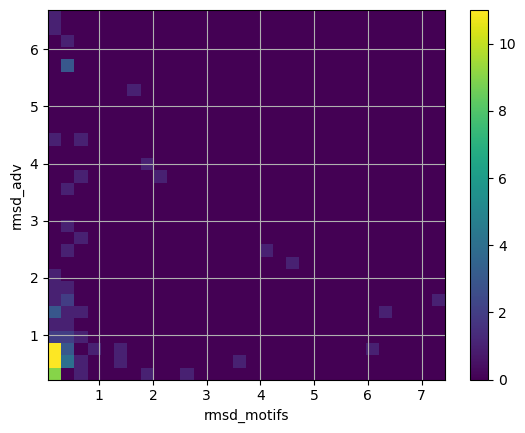

In [7]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs

#copy out rmsd columns of motifs and autodock
x = merged_df['rmsd_motifs']
y = merged_df['rmsd_adv']

#create a 2d histogram of the rmsd columns with 30 bins in each dimension
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#set plot labels
plt.xlabel('rmsd_motifs')
plt.ylabel('rmsd_adv')

#create 2d heatmap using viridis color scale
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', aspect='auto')

#add color bar
plt.colorbar()

#add grid
plt.grid(True)

#show plot
plt.show()

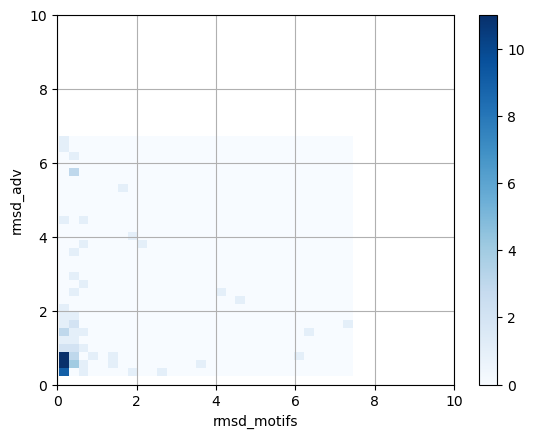

In [8]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = merged_df['rmsd_motifs']
y = merged_df['rmsd_adv']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('rmsd_motifs')
plt.ylabel('rmsd_adv')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

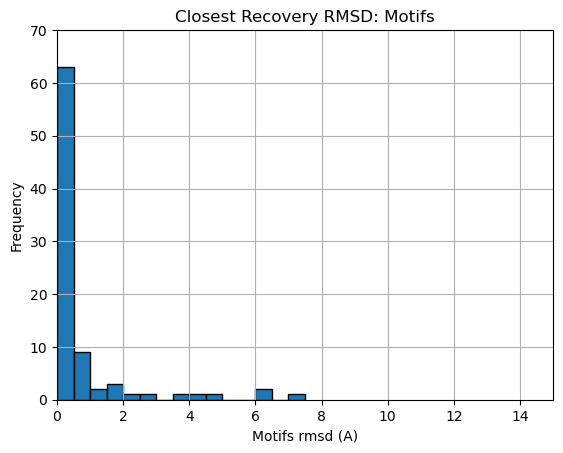

In [11]:
#create heatmap of Motifs closest recovery RMSDs

#extract motifs rmsds
x = merged_df['rmsd_motifs']
#set labels and title
plt.xlabel('Motifs rmsd (A)')
plt.ylabel('Frequency')
plt.title('Closest Recovery RMSD: Motifs')
#create 30 bin 1D hsitogram

# Define custom bin edges with 0.5 increments
bin_edges = np.arange(0, max(x) + 0.5, 0.5)
#bin_edges = np.arange(0, 15, 0.5)
#bin_edges = np.arange(min(x), max(x), 0.5)

# Plot histogram
#plt.hist(data, bins=bin_edges, edgecolor='black')

#plt.hist(x, bins=bin_edges, color='blue')
plt.hist(x, bins=bin_edges, edgecolor='black')
#set grid
plt.grid(True)
#show plot
plt.xlim(0,15)
plt.ylim(0,70)

plt.show()

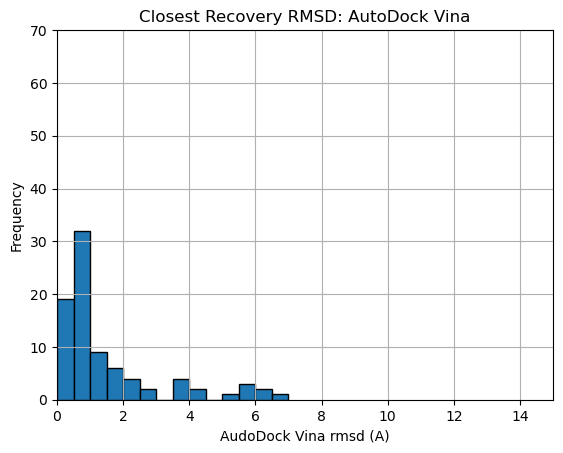

In [12]:
#create heatmap of Motifs closest recovery RMSDs

x = merged_df['rmsd_adv']
plt.xlabel('AudoDock Vina rmsd (A)')
plt.ylabel('Frequency')
plt.title('Closest Recovery RMSD: AutoDock Vina')
bin_edges = np.arange(0, max(x) + 0.5, 0.5)
#plt.hist(x, bins=bin_edges, color='blue')
plt.hist(x, bins=bin_edges, edgecolor='black')
plt.grid(True)

plt.ylim(0,70)
plt.xlim(0,15)
plt.show()

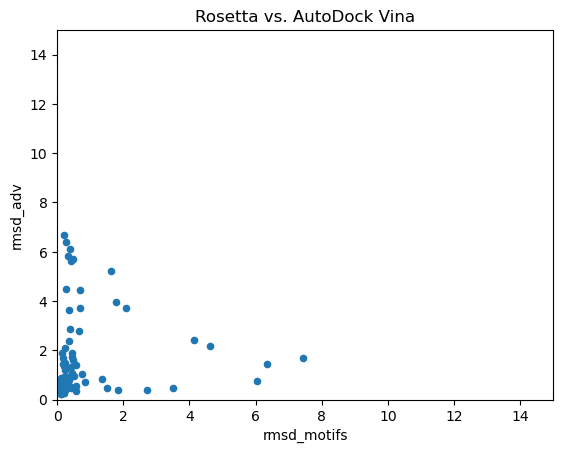

In [12]:
#make a scatterplot in the place of the heatmap
merged_df.plot(kind='scatter',x='rmsd_motifs',y='rmsd_adv')
plt.xlim(0,15)
plt.ylim(0,15)
plt.title("Rosetta vs. AutoDock Vina")
plt.show()

In [31]:
all_systems_string = ""
counter = 0
for system in merged_df['system']:
    #print(system + ",")
    all_systems_string = all_systems_string + system + ","
    counter = counter + 1
    print(counter)
    
print(all_systems_string)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
aa2ar,abl1,ace,aces,ada,ada17,adrb1,adrb2,akt1,akt2,aldr,ampc,andr,aofb,bace1,braf,cah2,casp3,comt,cp2c9,csf1r,cxcr4,def,dhi1,dpp4,dyr,egfr,esr1,esr2,fa10,fa7,fabp4,fgfr1,fkb1a,fnta,fpps,glcm,gria2,grik1,hdac2,hdac8,hivpr,hivrt,hmdh,hs90a,igf1r,inha,ital,jak2,kif11,kit,kith,kpcb,lck,lkha4,mapk2,mcr,met,mk10,mmp13,mp2k1,nos1,nram,pa2ga,parp1,pgh2,plk1,pnph,ppara,ppard,pparg,prgr,pur2,pygm,pyrd,reni,rock1,rxra,sahh,tgfr1,thb,thrb,tryb1,urok,xiap,
